In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

1.Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [4]:
#200,000 rows giving errors, so imported only 200,00 rows :-) to solve the loading issues and memory error.
df = pd.read_csv("small-311-2015.csv")
df.head(5)

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [5]:
df.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [6]:
dateutil.parser.parse("07/04/2015 03:33:09 AM")

datetime.datetime(2015, 7, 4, 3, 33, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 53 columns):
Unique Key                        19999 non-null int64
Created Date                      19999 non-null object
Closed Date                       18787 non-null object
Agency                            19999 non-null object
Agency Name                       19999 non-null object
Complaint Type                    19999 non-null object
Descriptor                        19744 non-null object
Location Type                     18371 non-null object
Incident Zip                      18779 non-null object
Incident Address                  15073 non-null object
Street Name                       15069 non-null object
Cross Street 1                    13224 non-null object
Cross Street 2                    13179 non-null object
Intersection Street 1             2992 non-null object
Intersection Street 2             2965 non-null object
Address Type                      18095 non-null objec

In [8]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['created_datetime'] = df['Created Date'].apply(parse_date)
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29


In [9]:
df.index = df['created_datetime']

In [10]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27


2.What was the **most popular type of complaint**, and how many times was it filed?

In [11]:
df['Complaint Type'].value_counts().head(5)



Blocked Driveway           2534
Illegal Parking            2410
Noise - Street/Sidewalk    1584
Street Condition           1216
Noise - Commercial         1162
Name: Complaint Type, dtype: int64

3.Make a horizontal bar graph of the **top 5 most frequent complaint types**.

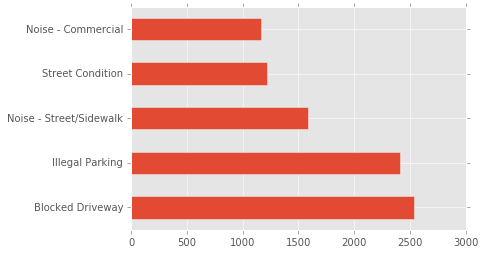

In [12]:
df['Complaint Type'].value_counts().head(5).plot(kind='barh', y='Complaint Type')

4.Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [13]:
columns_to_show = ['Park Borough', 'Complaint Type']
complaints = df[columns_to_show]

complaints.head()

,Park Borough,Complaint Type
created_datetime,,
2015-07-06 10:58:27,QUEENS,Consumer Complaint
2015-07-03 13:26:29,MANHATTAN,Vending
2015-11-09 03:55:09,BRONX,Blocked Driveway
2015-07-03 02:18:32,QUEENS,Noise - Commercial
2015-07-04 00:03:27,BROOKLYN,Noise - Street/Sidewalk


In [14]:
new_list = pd.DataFrame(complaints['Park Borough'].value_counts())
new_list.head(6)

,Park Borough
BROOKLYN,5761
QUEENS,5500
MANHATTAN,4491
BRONX,2446
Unspecified,987
STATEN ISLAND,814


In [15]:
new_comp = complaints.merge(new_list, left_on='Park Borough', right_index=True)
new_comp.head(3)

,Park Borough,Park Borough_x,Complaint Type,Park Borough_y
created_datetime,,,,
2015-07-06 10:58:27,QUEENS,QUEENS,Consumer Complaint,5500
2015-07-03 02:18:32,QUEENS,QUEENS,Noise - Commercial,5500
2015-07-09 00:00:00,QUEENS,QUEENS,Standing Water,5500


In [16]:
new_comp['count'] = new_comp['Park Borough_y']

In [17]:
new_comp.head()

,Park Borough,Park Borough_x,Complaint Type,Park Borough_y,count
created_datetime,,,,,
2015-07-06 10:58:27,QUEENS,QUEENS,Consumer Complaint,5500,5500
2015-07-03 02:18:32,QUEENS,QUEENS,Noise - Commercial,5500,5500
2015-07-09 00:00:00,QUEENS,QUEENS,Standing Water,5500,5500
2015-08-12 11:09:49,QUEENS,QUEENS,Consumer Complaint,5500,5500
2015-09-09 12:12:46,QUEENS,QUEENS,Overgrown Tree/Branches,5500,5500


In [18]:
new_complaints = new_comp.drop(['Park Borough_x','Park Borough_y'], axis=1)

In [19]:
new_complaints.head()

,Park Borough,Complaint Type,count
created_datetime,,,
2015-07-06 10:58:27,QUEENS,Consumer Complaint,5500
2015-07-03 02:18:32,QUEENS,Noise - Commercial,5500
2015-07-09 00:00:00,QUEENS,Standing Water,5500
2015-08-12 11:09:49,QUEENS,Consumer Complaint,5500
2015-09-09 12:12:46,QUEENS,Overgrown Tree/Branches,5500


In [20]:
new_list.head(6)

,Park Borough
BROOKLYN,5761
QUEENS,5500
MANHATTAN,4491
BRONX,2446
Unspecified,987
STATEN ISLAND,814


In [21]:
#mh 1,636,268, Bronx	1,438,159 brooklyn	2,621,793, queens -2,321,580 stalen 
per_capita = {'BROOKLYN':2621793,'QUEENS': 2321580,'MANHATTAN':1636268,'BRONX':1438159, 'STATEN ISLAND':472621, 'Unspecified':0}

my_list = pd.DataFrame.from_dict(per_capita,orient='index')
my_list.head()

,0
QUEENS,2321580
STATEN ISLAND,472621
Unspecified,0
BROOKLYN,2621793
BRONX,1438159


In [22]:
my_list.columns = ['population']

In [23]:
my_list

,population
QUEENS,2321580
STATEN ISLAND,472621
Unspecified,0
BROOKLYN,2621793
BRONX,1438159
MANHATTAN,1636268


In [24]:
per_cap = new_list.merge(my_list, left_index=True, right_index=True)
per_cap.head(6)

,Park Borough,population
QUEENS,5500,2321580
STATEN ISLAND,814,472621
Unspecified,987,0
BROOKLYN,5761,2621793
BRONX,2446,1438159
MANHATTAN,4491,1636268


In [25]:
per_cap['count'] = per_cap['Park Borough']
per_cap.drop('Park Borough', axis=1)

,population,count
QUEENS,2321580,5500
STATEN ISLAND,472621,814
Unspecified,0,987
BROOKLYN,2621793,5761
BRONX,1438159,2446
MANHATTAN,1636268,4491


In [26]:
#finally calculating complaints per capita
per_cap['per_capital'] = per_cap['Park Borough'] / per_cap['population']
per_cap.head(6).sort_values(by='per_capital', ascending=False)

,Park Borough,population,count,per_capital
Unspecified,987,0,987,inf
MANHATTAN,4491,1636268,4491,0.002745
QUEENS,5500,2321580,5500,0.002369
BROOKLYN,5761,2621793,5761,0.002197
STATEN ISLAND,814,472621,814,0.001722
BRONX,2446,1438159,2446,0.001701


6.According to your selection of data, **how many cases were filed in March?** How about May?

In [27]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09


In [28]:
march = df['2015-03']

In [29]:
total_march = pd.value_counts(march['Complaint Type'],sort=True)
total_march

Blocked Driveway                  275
Illegal Parking                   221
Highway Condition                 218
Street Condition                  204
Consumer Complaint                166
Benefit Card Replacement          136
Noise - Commercial                132
Taxi Complaint                     81
Food Establishment                 77
SCRIE                              67
Broken Muni Meter                  65
Noise - Street/Sidewalk            65
Derelict Vehicle                   62
Construction                       49
Noise - Vehicle                    46
Damaged Tree                       42
Indoor Air Quality                 35
Fire Safety Director - F58         33
Animal Abuse                       27
For Hire Vehicle Complaint         27
Sidewalk Condition                 23
Graffiti                           23
Root/Sewer/Sidewalk Condition      22
Overgrown Tree/Branches            22
Maintenance or Facility            18
Dead Tree                          17
Food Poisoni

In [30]:
print("The total number of complaints is", total_march.sum())

The total number of complaints is 2360


In [31]:
may = df['2015-05']

In [32]:
total_may = pd.value_counts(may['Complaint Type'],sort=True)
total_may

Street Condition                     67
Noise - Street/Sidewalk              63
Illegal Parking                      62
Blocked Driveway                     52
Noise - Commercial                   40
Broken Muni Meter                    27
Graffiti                             20
Noise - Vehicle                      20
Derelict Vehicle                     16
Maintenance or Facility               8
Vending                               7
Homeless Encampment                   7
Animal Abuse                          6
Traffic                               5
Overgrown Tree/Branches               5
Taxi Complaint                        4
Consumer Complaint                    3
Noise - Park                          3
Street Light Condition                3
Building/Use                          3
Panhandling                           3
Highway Condition                     3
Indoor Sewage                         3
Standing Water                        2
Drinking                              2


In [33]:
print("The total number of complaints is", total_may.sum())

The total number of complaints is 466


7). I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [34]:
April = df['2015-04']
April.sort('created_datetime').head()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 00:09:40,30298884,04/01/2015 12:09:40 AM,04/01/2015 02:17:16 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11433,150-38 107 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694510,-73.800763,"(40.69451003870482, -73.80076336778066)",2015-04-01 00:09:40
2015-04-01 00:13:05,30298345,04/01/2015 12:13:05 AM,04/01/2015 03:03:50 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11232,129 32 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.657200,-74.003154,"(40.65719981107672, -74.00315362091445)",2015-04-01 00:13:05
2015-04-01 01:28:45,30298825,04/01/2015 01:28:45 AM,04/01/2015 02:36:49 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11232,4001 8 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.646630,-73.997960,"(40.646629679609966, -73.99796038095705)",2015-04-01 01:28:45
2015-04-01 04:47:37,30313064,04/01/2015 04:47:37 AM,04/06/2015 04:37:53 PM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.672797,-73.983284,"(40.672797214041466, -73.98328370274999)",2015-04-01 04:47:37
2015-04-01 05:06:40,30312979,04/01/2015 05:06:40 AM,04/01/2015 07:05:40 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11221,717 MADISON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687312,-73.928130,"(40.68731230396636, -73.92812986821195)",2015-04-01 05:06:40


In [35]:
April[:"20150401"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


8.What was the most popular type of complaint on April 1st?

In [36]:
april_complaints = April[:"20150401"]
pd.value_counts(april_complaints['Complaint Type'],sort=True).head(1)

Street Condition    18
Name: Complaint Type, dtype: int64

9.What were the **most popular three types of complaint** on April 1st

In [37]:
pd.value_counts(april_complaints['Complaint Type'],sort=True).head(3)

Street Condition      18
Illegal Parking       15
Consumer Complaint    12
Name: Complaint Type, dtype: int64

10) **What month has the most reports filed?** How many? Graph it.

In [38]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09


In [39]:
df.resample('M').count().sort_values('Created Date', ascending=False).head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,3352,3352,3169,3352,3352,3352,3296,3185,3204,2642,...,19,19,19,1,2,4,3100,3100,3100,3352


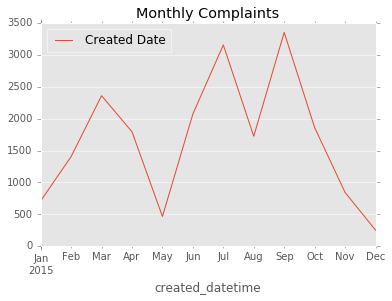

In [40]:
ax = df.resample('M').count().plot(y='Created Date')
ax.set_title("Monthly Complaints")

 11) **What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [41]:
df.resample('W').count().sort_values('Created Date', ascending=False).head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-27,982,982,937,982,982,982,966,941,940,798,...,4,4,4,0,1,2,907,907,907,982


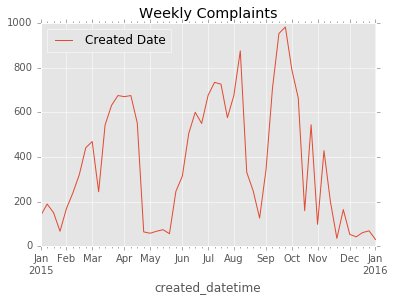

In [42]:
ax = df.resample('W').count().plot(y='Created Date')
ax.set_title("Weekly Complaints")

12). Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [43]:
columns_req =  ['Complaint Type']
find_noice= df[columns_req]

find_noice.head()

,Complaint Type
created_datetime,
2015-07-06 10:58:27,Consumer Complaint
2015-07-03 13:26:29,Vending
2015-11-09 03:55:09,Blocked Driveway
2015-07-03 02:18:32,Noise - Commercial
2015-07-04 00:03:27,Noise - Street/Sidewalk


In [44]:
df_noice = find_noice[find_noice['Complaint Type'].str.contains("Noise", case=False)]

In [45]:
df_noice.head(3)

,Complaint Type
created_datetime,
2015-07-03 02:18:32,Noise - Commercial
2015-07-04 00:03:27,Noise - Street/Sidewalk
2015-09-09 21:59:03,Noise - Street/Sidewalk


In [46]:
df_noice.resample('D').count().head(4)

,Complaint Type
created_datetime,
2015-01-01,10
2015-01-02,3
2015-01-03,4
2015-01-04,8


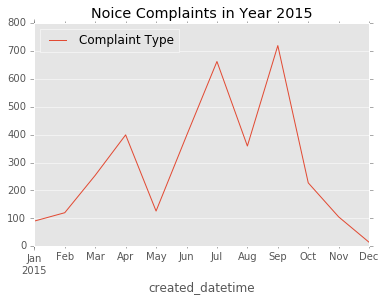

In [47]:
ax = df_noice.resample('M').count().plot(y='Complaint Type')
ax.set_title("Noice Complaints in Year 2015")

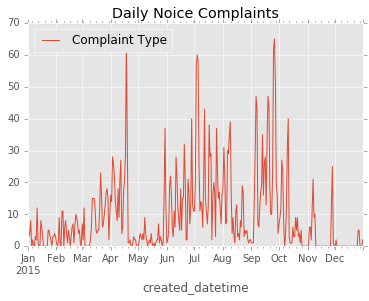

In [48]:
ax = df_noice.resample('D').count().plot(y='Complaint Type')
ax.set_title("Daily Noice Complaints")

 13) **Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [49]:
top_days = find_noice.resample('D').count().sort_values('Complaint Type', ascending=False)
top_days.head(5)

,Complaint Type
created_datetime,
2015-10-19,338
2015-09-25,230
2015-08-03,227
2015-08-06,191
2015-09-10,187


In [50]:
top_days['complaint count'] = top_days['Complaint Type']

In [51]:
t_days = top_days.drop('Complaint Type', axis=1).head(5)

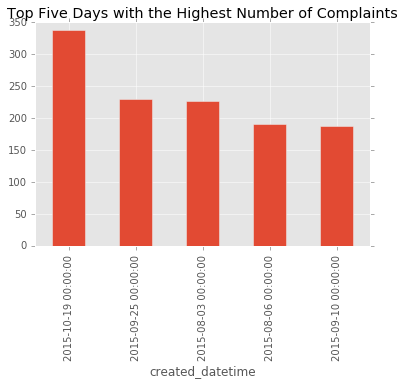

In [52]:
ax = t_days['complaint count'].plot(kind='bar',x= 't_days.index', y='complaint count')

ax.set_title("Top Five Days with the Highest Number of Complaints")

 14) **What hour of the day are the most complaints?** Graph a day of complaints.

In [53]:
df['Unique Key'].groupby(by=df.index.hour).count()

0      829
1      506
2      299
3      181
4      186
5      158
6      319
7      556
8      820
9     1160
10    1238
11    1253
12    1320
13    1261
14    1218
15    1175
16    1119
17     996
18    1014
19     824
20     840
21     883
22     949
23     895
Name: Unique Key, dtype: int64

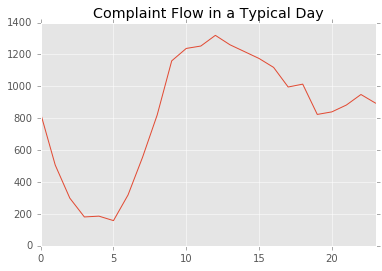

In [54]:
ax = df['Unique Key'].groupby(by=df.index.hour).count().plot()
ax.set_title("Complaint Flow in a Typical Day")

15) . One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [55]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09


In [56]:
# 0 stands for 12.0 midnight
df[df.index.hour==0].head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-09 00:00:00
2015-07-09 00:00:00,31037751,07/09/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,3+ Family Apartment Building,10016,379 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.741537,-73.981163,"(40.741536747969185, -73.98116258383294)",2015-07-09 00:00:00


In [57]:
most_comp = df[df.index.hour==0]

In [58]:
# after filtering out, counted all the unique values in the Complaint Type.
most_comp['Complaint Type'].value_counts().head(3)

Noise - Street/Sidewalk    185
Noise - Commercial         179
Illegal Parking             86
Name: Complaint Type, dtype: int64

In [59]:
most_comp_before = df[df.index.hour==23]

In [60]:
most_comp_before['Complaint Type'].value_counts().head(3)

Noise - Street/Sidewalk    206
Noise - Commercial         199
Blocked Driveway           116
Name: Complaint Type, dtype: int64

In [61]:
most_comp_after = df[df.index.hour==1]

In [62]:
most_comp_after['Complaint Type'].value_counts().head(3)

Noise - Street/Sidewalk    156
Noise - Commercial         114
Blocked Driveway            63
Name: Complaint Type, dtype: int64

16 ) So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [63]:
most_comp.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-04 00:03:27,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:03:27
2015-07-09 00:00:00,31042454,07/09/2015 12:00:00 AM,07/20/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Other - Explain Below,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-09 00:00:00
2015-07-09 00:00:00,31037751,07/09/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Standing Water,Puddle in Ground,3+ Family Apartment Building,10016,379 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.741537,-73.981163,"(40.741536747969185, -73.98116258383294)",2015-07-09 00:00:00


In [64]:
most_comp['Complaint Type'].groupby(by=most_comp.index.minute).value_counts()

    Complaint Type                
0   Rodent                            66
    Standing Water                    39
    Food Poisoning                     8
    Unsanitary Animal Pvt Property     4
    Noise - Commercial                 3
    Noise - Street/Sidewalk            3
    Blocked Driveway                   2
    APPLIANCE                          1
    Noise - Park                       1
    Noise - Vehicle                    1
    Street Condition                   1
    Traffic Signal Condition           1
    Unsanitary Pigeon Condition        1
1   Noise - Commercial                 6
    Noise - Street/Sidewalk            6
    Blocked Driveway                   2
    Illegal Parking                    1
    PLUMBING                           1
2   Noise - Commercial                 3
    Noise - Street/Sidewalk            3
    Blocked Driveway                   2
    Construction                       1
    Illegal Parking                    1
    Taxi Complaint    

17) Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [65]:
df['Agency'].value_counts().head(5)

NYPD     9745
DOT      2838
DPR      1800
HPD      1232
DOHMH     893
Name: Agency, dtype: int64

In [66]:
agency = df[(df['Agency'] == 'NYPD') | (df['Agency'] == 'DOT') | (df['Agency'] == 'DPR') | (df['Agency'] == 'HPD') | (df['Agency'] == 'DOMMH')]

In [67]:
agency.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32


In [68]:
nypd=agency[(agency['Agency'] == 'NYPD')]
dot=agency[(agency['Agency'] == 'DOT')]
dpr=agency[(agency['Agency'] == 'DPR')]
hpd=agency[(agency['Agency'] == 'HPD')]
dohmh=agency[(agency['Agency'] == 'DOHMH')]

In [69]:
nypd.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09
2015-07-03 02:18:32,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:18:32


In [83]:

columns_to_show = ['Complaint Type']
nypd_new = nypd[columns_to_show]
nypd_new.head(3)

,Complaint Type
created_datetime,
2015-07-03 13:26:29,Vending
2015-11-09 03:55:09,Blocked Driveway
2015-07-03 02:18:32,Noise - Commercial


In [84]:
nypd_new.resample('H').count().head(3)

,Complaint Type
created_datetime,
2015-01-01 00:00:00,2
2015-01-01 01:00:00,2
2015-01-01 02:00:00,0


TypeError: Empty 'DataFrame': no numeric data to plot

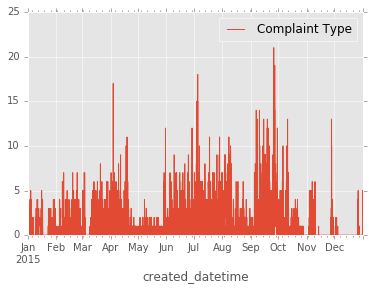

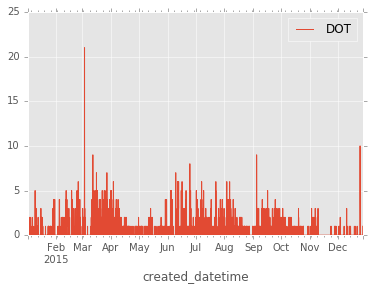

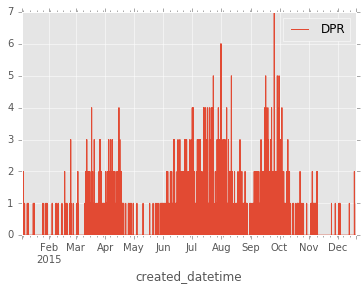

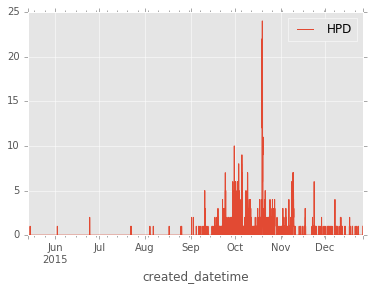

In [71]:
nypd.resample('H').count().plot(y='Complaint Type')
dot.resample('H').count().plot(y='Complaint Type',label = "DOT")
dpr.resample('H').count().plot(y='Complaint Type',label = "DPR")
hpd.resample('H').count().plot(y='Complaint Type',label = "HPD")
dohmh.resample('H').count().plot(y='Complaint Type',label = "DOHMH")

In [ ]:
#ax = nypd.resample('H').count().plot(y='Complaint Type')
#dot.resample('H').count().plot(y='Complaint Type', ax=ax, label = "DOT")
#dpr.resample('H').count().plot(y='Complaint Type', ax=ax, label = "DPR")
#hpd.resample('H').count().plot(y='Complaint Type', ax=ax, label = "HPD")
#dohmh.resample('H').count().plot(y='Complaint Type', ax=ax, label = "DOHMH")

18) Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

In [ ]:
nypd.resample('W').count().plot(y='Complaint Type', label ='NYPD')
dot.resample('W').count().plot(y='Complaint Type',label = "DOT")
dpr.resample('W').count().plot(y='Complaint Type',label = "DPR")
hpd.resample('W').count().plot(y='Complaint Type',label = "HPD")
dohmh.resample('W').count().plot(y='Complaint Type',label = "DOHMH")

19) Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [ ]:
july_aug = nypd[(nypd.index.month==7)| (nypd.index.month==8)]

In [ ]:
july_aug['Complaint Type'].value_counts().head(5)

In [ ]:
may = nypd[(nypd.index.month==5)]

In [ ]:
may['Complaint Type'].value_counts().head(5)

In [ ]:
winter = hpd[(hpd.index.month==12)| (hpd.index.month==1)| (hpd.index.month==2)]

In [ ]:
winter['Complaint Type'].value_counts().head(5)

In [ ]:
summer = hpd[(hpd.index.month==6)| (hpd.index.month==7)| (hpd.index.month==8)]

In [ ]:
summer['Complaint Type'].value_counts().head(5)